In [100]:
# Data Drift Impact on Model
# Question: Use a simple linear regression model to demonstrate how data drift affects model predictions.

# 1. Train a model on the original data:
# 2. Evaluate on the drifted data:
# 3. Compare errors:




Mean Squared Error on Original Data: 3.23
Mean Squared Error on Drifted Data: 3.65


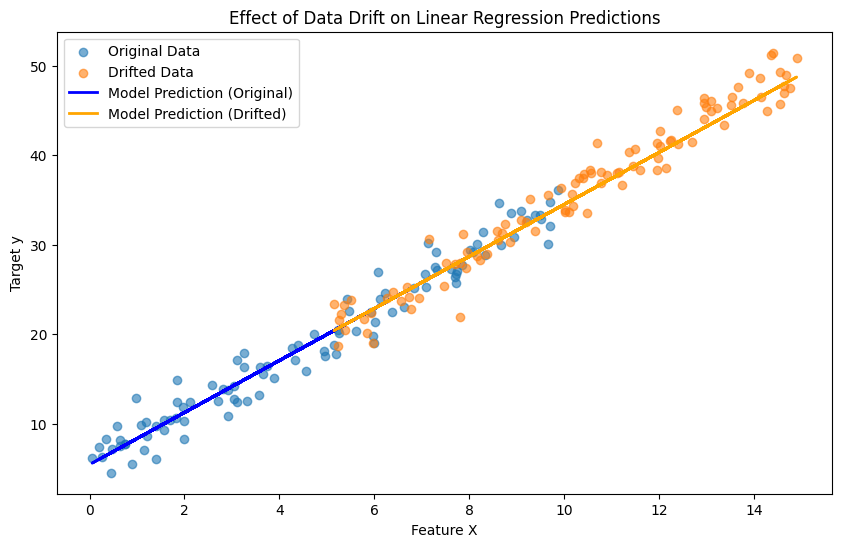

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Create original data (training data)
np.random.seed(42)
X_original = np.random.uniform(0, 10, 100).reshape(-1, 1)
y_original = 3 * X_original.flatten() + 5 + np.random.normal(0, 2, 100)  # y = 3x + 5 + noise

# Train Linear Regression on original data
model = LinearRegression()
model.fit(X_original, y_original)

# Predictions on original data
y_pred_original = model.predict(X_original)
mse_original = mean_squared_error(y_original, y_pred_original)

print(f"Mean Squared Error on Original Data: {mse_original:.2f}")

# 2. Create drifted data
# Simulate data drift by changing the feature distribution (shifted X)
X_drifted = np.random.uniform(5, 15, 100).reshape(-1, 1)  # Shift feature range to [5,15]
# True relationship remains the same, but X is different
y_drifted = 3 * X_drifted.flatten() + 5 + np.random.normal(0, 2, 100)

# Predict on drifted data using the original model
y_pred_drifted = model.predict(X_drifted)
mse_drifted = mean_squared_error(y_drifted, y_pred_drifted)

print(f"Mean Squared Error on Drifted Data: {mse_drifted:.2f}")

# 3. Visualize results
plt.figure(figsize=(10,6))
plt.scatter(X_original, y_original, label='Original Data', alpha=0.6)
plt.scatter(X_drifted, y_drifted, label='Drifted Data', alpha=0.6)
plt.plot(X_original, y_pred_original, color='blue', linewidth=2, label='Model Prediction (Original)')
plt.plot(X_drifted, y_pred_drifted, color='orange', linewidth=2, label='Model Prediction (Drifted)')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Effect of Data Drift on Linear Regression Predictions')
plt.legend()
plt.show()


In [102]:
# Monitoring Data Distribution Changes
# Question: Use Python to monitor distribution changes in features to detect potential data drift.

# 1. Calculate feature statistics (mean and standard deviation) for both original and drifted data:
# 2. Compare statistics:
# 3. Set thresholds to detect significant drift:




In [103]:
import numpy as np

# Original data feature (e.g. X from previous example)
np.random.seed(42)
X_original = np.random.uniform(0, 10, 100)

# Drifted data feature (shifted distribution)
X_drifted = np.random.uniform(5, 15, 100)

# 1. Calculate mean and std for both datasets
mean_original = np.mean(X_original)
std_original = np.std(X_original)

mean_drifted = np.mean(X_drifted)
std_drifted = np.std(X_drifted)

print(f"Original Mean: {mean_original:.2f}, Std: {std_original:.2f}")
print(f"Drifted Mean: {mean_drifted:.2f}, Std: {std_drifted:.2f}")

# 2. Compare statistics
mean_diff = abs(mean_original - mean_drifted)
std_diff = abs(std_original - std_drifted)

print(f"Mean difference: {mean_diff:.2f}")
print(f"Std difference: {std_diff:.2f}")

# 3. Set thresholds to detect significant drift (example thresholds)
mean_threshold = 2.0
std_threshold = 1.0

if mean_diff > mean_threshold:
    print("Data drift detected based on mean difference!")
else:
    print("No significant data drift based on mean.")

if std_diff > std_threshold:
    print("Data drift detected based on std deviation difference!")
else:
    print("No significant data drift based on std deviation.")


Original Mean: 4.70, Std: 2.96
Drifted Mean: 9.98, Std: 2.92
Mean difference: 5.28
Std difference: 0.04
Data drift detected based on mean difference!
No significant data drift based on std deviation.


In [104]:
# Automating Data Quality Checks with Python
# Question: Automate a basic data validation process using Python to ensure the dataset's
# structural integrity.

# 1. Define validation checks:
# 2. Apply validation:




In [105]:
import pandas as pd

def validate_dataset(df):
    validation_results = {}

    # 1. Check for missing values in each column
    missing_values = df.isnull().sum()
    validation_results['missing_values'] = missing_values

    # 2. Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    validation_results['duplicate_rows'] = duplicate_rows

    # 3. Check data types of columns
    data_types = df.dtypes
    validation_results['data_types'] = data_types

    # 4. Check for expected columns (example)
    expected_columns = ['ID', 'Name', 'Email', 'Phone']
    missing_columns = [col for col in expected_columns if col not in df.columns]
    validation_results['missing_columns'] = missing_columns

    # 5. Unique values count for categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    unique_counts = {col: df[col].nunique() for col in categorical_columns}
    validation_results['unique_value_counts'] = unique_counts

    return validation_results


# Sample data to test the validation (replace or extend as needed)
data = {
    'ID': [1, 2, 3, 3],
    'Name': ['Alice', 'Bob', None, 'Bob'],
    'Email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'bob@example.com'],
    'Phone': ['123-4567', None, '987-6543', None],
    # 'Address' column intentionally missing to test missing column check
}

df = pd.DataFrame(data)

# Run validation
results = validate_dataset(df)

print("Data Quality Validation Results:")
for check, result in results.items():
    print(f"\n{check}:")
    print(result)


Data Quality Validation Results:

missing_values:
ID       0
Name     1
Email    0
Phone    2
dtype: int64

duplicate_rows:
0

data_types:
ID        int64
Name     object
Email    object
Phone    object
dtype: object

missing_columns:
[]

unique_value_counts:
{'Name': 2, 'Email': 3, 'Phone': 2}


In [106]:
# Introducing Great Expectations for Data Validation
# Question: Use Great Expectations to set up data validation checks for a dataset.

# 1. Install Great Expectations:
# 2. Create a new expectations suite:
# 3. Load data and generate expectations:




In [107]:
import pandas as pd
import great_expectations as ge

df = pd.DataFrame({
    "age": [25, 35, 50, 120, -1, 40],
    "name": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank"]
})

ge_df = ge.from_pandas(df)

ge_df.expect_column_to_exist("age")
ge_df.expect_column_values_to_be_between("age", min_value=0, max_value=120)

results = ge_df.validate()
print(results)


AttributeError: module 'great_expectations' has no attribute 'from_pandas'

In [ ]:
# Automating Constraint Checks with Python
# Question: Automate primary key and foreign key constraint checks using Python to ensure dataset compliance.


# 1. Assuming datasets exist with primary and foreign key relationships in pandas dataframes employees_df and departments_df :




In [ ]:
import pandas as pd

# Sample data
employees_df = pd.DataFrame({
    'employee_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'department_id': [101, 102, 103, 104, 999]  # Note: 999 does not exist in departments_df
})

departments_df = pd.DataFrame({
    'department_id': [101, 102, 103, 104],
    'department_name': ['HR', 'Engineering', 'Sales', 'Marketing']
})

# Function to check primary key uniqueness and non-null
def check_primary_key(df, pk_col):
    is_unique = df[pk_col].is_unique
    no_nulls = df[pk_col].notnull().all()
    print(f"Primary Key Check on '{pk_col}': Unique={is_unique}, No Nulls={no_nulls}")
    return is_unique and no_nulls

# Function to check foreign key integrity
def check_foreign_key(fk_df, fk_col, pk_df, pk_col):
    fk_values = fk_df[fk_col].dropna().unique()
    pk_values = pk_df[pk_col].unique()
    missing_keys = set(fk_values) - set(pk_values)
    if missing_keys:
        print(f"Foreign Key Check FAILED: Missing referenced keys: {missing_keys}")
        return False
    else:
        print("Foreign Key Check PASSED: All foreign keys have matching primary keys.")
        return True

# Run checks
pk_check_employees = check_primary_key(employees_df, 'employee_id')
pk_check_departments = check_primary_key(departments_df, 'department_id')

fk_check = check_foreign_key(employees_df, 'department_id', departments_df, 'department_id')


Primary Key Check on 'employee_id': Unique=True, No Nulls=True
Primary Key Check on 'department_id': Unique=True, No Nulls=True
Foreign Key Check FAILED: Missing referenced keys: {999}


In [ ]:
# Advanced Data Drift Detection using Statistical Tests
# Question: Implement Kolmogorov-Smirnov test using Python to detect data drift at a more sophisticated level.

# 1. Use SciPy to perform KS test:




In [ ]:
import numpy as np
from scipy.stats import ks_2samp

# Sample data: reference dataset (e.g., training data)
data_ref = np.random.normal(loc=0, scale=1, size=1000)

# New dataset (e.g., production data)
data_new = np.random.normal(loc=0.5, scale=1, size=1000)

# Perform the KS test
ks_statistic, p_value = ks_2samp(data_ref, data_new)

print(f"KS statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Data drift detected: distributions are different (reject H0)")
else:
    print("No data drift detected: distributions are similar (fail to reject H0)")
